# **HEART DISEASE ANALYSIS** 

## **About Heart Disease**

> Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.



> From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients. 

## **About the Data set**
> The Framingham Heart Study (FHS) is dedicated to identifying common factors or characteristics that contribute to cardiovascular disease (CVD). In 1948, an original cohort of 5,209 men and women between 30 and 62 years old were recruited from Framingham, MA. An Offspring Cohort began in 1971, an Omni Cohort in 1994, a Third Generation Cohort in 2002, a New Offspring Spouse Cohort in 2004 and a Second Generation Omni Cohort in 2003. Core research in the dataset focuses on cardiovascular and cerebrovascular diseases. The data include biological specimens, molecular genetic data, phenotype data, samples, images, participant vascular functioning data, physiological data, demographic data, and ECG data.It is a collaborative project of the National Heart, Lung and Blood Institute and Boston University.


#### Attributes

#### Demographic
* Sex: male or female
* Age: Age of the patient
* Education: no further information provided

#### Behavioral
* Current Smoker: whether or not the patient is a current smoker
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day

#### Information on medical history
* BP Meds: whether or not the patient was on blood pressure medication 
* Prevalent Stroke: whether or not the patient had previously had a stroke
* Prevalent Hyp: whether or not the patient was hypertensive 
* Diabetes: whether or not the patient had diabetes

#### Information on current medical condition
* Tot Chol: total cholesterol level
* Sys BP: systolic blood pressure
* Dia BP: diastolic blood pressure
* BMI: Body Mass Index
* Heart Rate: heart rate - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.
* Glucose: glucose level

#### Target variable to predict
* TenYearCHD: 10 year risk of coronary heart disease (binary: “1:Yes”, “0:No”)

## Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

6) Conclusion

## Packages Required

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from sklearn.ensemble import StackingClassifier

In [2]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,44,3,0,0,0,0,0,0,243,146.0,91.0,26.72,80,104,0
1,0,63,1,0,0,0,0,1,0,289,158.0,80.0,32.66,75,84,0
2,0,39,3,1,20,0,0,0,0,190,85.0,70.0,22.43,88,60,0
3,0,37,3,1,15,0,0,0,0,173,101.0,69.0,20.02,63,73,0
4,0,40,3,1,15,0,0,0,0,304,121.0,88.0,22.52,60,80,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   int64  
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   int64  
 5   BPMeds           3656 non-null   int64  
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   int64  
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   int64  
 14  glucose          3656 non-null   int64  
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 457.1 KB


### **Missing Value Detection**

In [4]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Descriptive statistics**

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## **Model prepration**

In [6]:
y = data["TenYearCHD"]
X = data.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [7]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 2473, 1: 451})

## **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


In [8]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[622   4]
 [ 98   8]]


Accuracy of Logistic Regression: 86.0655737704918 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       626
           1       0.67      0.08      0.14       106

    accuracy                           0.86       732
   macro avg       0.77      0.53      0.53       732
weighted avg       0.84      0.86      0.81       732



In [9]:

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[582  44]
 [ 86  20]]


Accuracy of Naive Bayes model: 82.24043715846994 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       626
           1       0.31      0.19      0.24       106

    accuracy                           0.82       732
   macro avg       0.59      0.56      0.57       732
weighted avg       0.79      0.82      0.80       732



In [10]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[623   3]
 [105   1]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       626
           1       0.25      0.01      0.02       106

    accuracy                           0.85       732
   macro avg       0.55      0.50      0.47       732
weighted avg       0.77      0.85      0.79       732



In [11]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[626   0]
 [106   0]]


Accuracy of Extreme Gradient Boost: 85.51912568306011 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       626
           1       0.00      0.00      0.00       106

    accuracy                           0.86       732
   macro avg       0.43      0.50      0.46       732
weighted avg       0.73      0.86      0.79       732



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[622   4]
 [103   3]]


Accuracy of K-NeighborsClassifier: 85.38251366120218 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       626
           1       0.43      0.03      0.05       106

    accuracy                           0.85       732
   macro avg       0.64      0.51      0.49       732
weighted avg       0.80      0.85      0.80       732



In [13]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[614  12]
 [ 97   9]]


Accuracy of DecisionTreeClassifier: 85.10928961748634 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       626
           1       0.43      0.08      0.14       106

    accuracy                           0.85       732
   macro avg       0.65      0.53      0.53       732
weighted avg       0.80      0.85      0.81       732



In [14]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[618   8]
 [102   4]]


Accuracy of Support Vector Classifier: 84.97267759562843 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       626
           1       0.33      0.04      0.07       106

    accuracy                           0.85       732
   macro avg       0.60      0.51      0.49       732
weighted avg       0.78      0.85      0.80       732



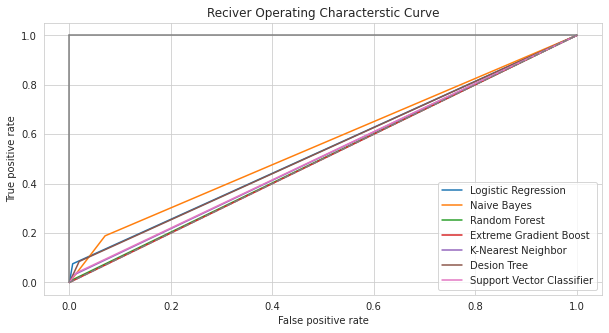

In [15]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [16]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.065574
1,Naive Bayes,82.240437
2,Random Forest,85.245902
3,Extreme Gradient Boost,85.519126
4,K-Nearest Neighbour,85.382514
5,Decision Tree,85.109290
6,Support Vector Machine,84.972678


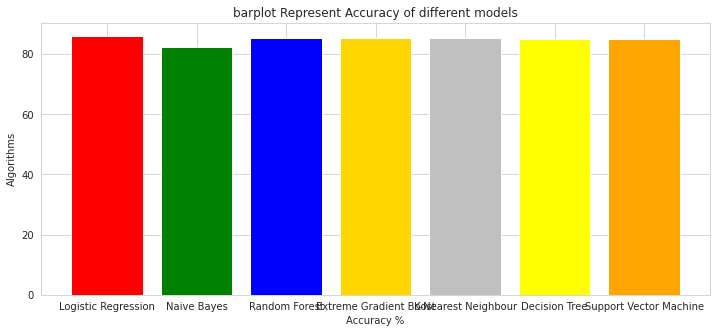

In [17]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **Trying to train with undersampling**

1) The dataset is unbalanced, so the accuracies can be misleading.

2) Thus we try to train all the algorithms again with undersampling.

3) Undersampling removes random entries so that the dataset becomes balanced.




In [18]:
y = data["TenYearCHD"]
k=y
X = data.drop('TenYearCHD',axis=1)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
X, y = rus.fit_resample(X, y)

print('original dataset shape:', Counter(k))
print('Resample dataset shape', Counter(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


original dataset shape: Counter({0: 3099, 1: 557})
Resample dataset shape Counter({0: 557, 1: 557})


## **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


In [19]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[75 30]
 [44 74]]


Accuracy of Logistic Regression: 66.81614349775785 

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       105
           1       0.71      0.63      0.67       118

    accuracy                           0.67       223
   macro avg       0.67      0.67      0.67       223
weighted avg       0.67      0.67      0.67       223



In [20]:

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[95 10]
 [86 32]]


Accuracy of Naive Bayes model: 56.95067264573991 

              precision    recall  f1-score   support

           0       0.52      0.90      0.66       105
           1       0.76      0.27      0.40       118

    accuracy                           0.57       223
   macro avg       0.64      0.59      0.53       223
weighted avg       0.65      0.57      0.52       223



In [21]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[80 25]
 [46 72]]


Accuracy of Random Forest: 68.16143497757847 

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       105
           1       0.74      0.61      0.67       118

    accuracy                           0.68       223
   macro avg       0.69      0.69      0.68       223
weighted avg       0.69      0.68      0.68       223



In [22]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[77 28]
 [52 66]]


Accuracy of Extreme Gradient Boost: 64.12556053811659 

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       105
           1       0.70      0.56      0.62       118

    accuracy                           0.64       223
   macro avg       0.65      0.65      0.64       223
weighted avg       0.65      0.64      0.64       223



In [23]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[78 27]
 [61 57]]


Accuracy of K-NeighborsClassifier: 60.53811659192825 

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       105
           1       0.68      0.48      0.56       118

    accuracy                           0.61       223
   macro avg       0.62      0.61      0.60       223
weighted avg       0.62      0.61      0.60       223



In [24]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[71 34]
 [40 78]]


Accuracy of DecisionTreeClassifier: 66.81614349775785 

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       105
           1       0.70      0.66      0.68       118

    accuracy                           0.67       223
   macro avg       0.67      0.67      0.67       223
weighted avg       0.67      0.67      0.67       223



In [25]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[74 31]
 [50 68]]


Accuracy of Support Vector Classifier: 63.67713004484305 

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       105
           1       0.69      0.58      0.63       118

    accuracy                           0.64       223
   macro avg       0.64      0.64      0.64       223
weighted avg       0.64      0.64      0.64       223



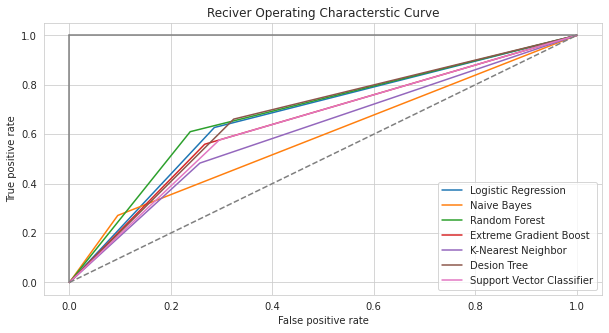

In [26]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [27]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,66.816143
1,Naive Bayes,56.950673
2,Random Forest,68.161435
3,Extreme Gradient Boost,64.125561
4,K-Nearest Neighbour,60.538117
5,Decision Tree,66.816143
6,Support Vector Machine,63.677130


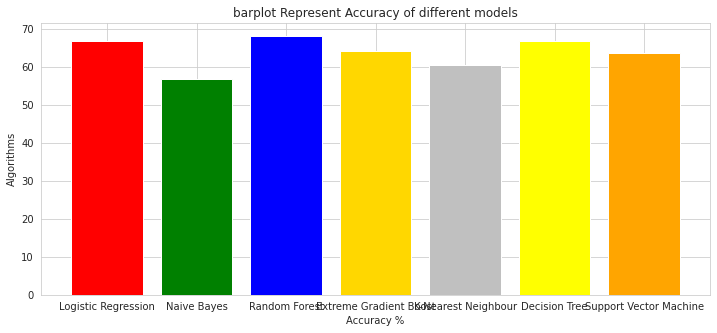

In [28]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **Conclusion**

1) In the unbalanced dataset, the highest accuracy was achieved by Logistic Regression.

2) The accuracy was misleading tho since the data was extremely unbalanced and randomly guessing 0 for every datapoint would've given an accuracy of 82+%

3) We then tried under-sampling and got an accuracy of 68% with the random-forest model.

4) This is way more realistic.